<a href="https://colab.research.google.com/github/sadamzuoby/Financial-analysis-tools/blob/main/Financial%20%26%20accounting%20analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# تثبيت الحزم الضرورية في Google Colab
!pip install openpyxl

# استيراد المكتبات
import pandas as pd
import numpy as np
from google.colab import files

# رفع ملف Excel
uploaded = files.upload()

# قراءة ملف Excel - يفترض أن يحتوي على عمود "البيان" وأعمدة السنوات
file_name = list(uploaded.keys())[0]
df = pd.read_excel(file_name)

# عرض أول 5 صفوف من الجدول للتأكد من القراءة الصحيحة
print("عرض مبدئي للبيانات:")
display(df.head())

# تنظيف البيانات: تحويل القيم المالية إلى أرقام بإزالة الفواصل
def clean_financial_values(val):
    try:
        if isinstance(val, str):
            return float(val.replace(',', '').replace('٫', '').strip())
        return float(val)
    except:
        return np.nan

# تطبيق التنظيف على كل الأعمدة عدا عمود "البيان"
for col in df.columns:
    if col != 'البيان':
        df[col] = df[col].apply(clean_financial_values)

# عرض البيانات بعد التنظيف
print("عرض البيانات بعد التنظيف:")
display(df.head())


Saving Book1.xlsx to Book1 (17).xlsx
عرض مبدئي للبيانات:


,البيان,2019,2020,2021,2022,2023,2024,Unnamed: 7
0,الأصول المتداولة,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,نقد وأرصدة لدى البنك المركزي,906069815.0,828778523.0,893840158.0,719230111.0,777350208.0,859676387.0,Cash and balances with central bank
2,أرصدة لدى بنوك ومؤسسات مصرفية,17681535.0,50600540.0,52703935.0,43400535.0,81079251.0,178212998.0,Balances at banks and financial institutions
3,حسابات إستثمار لدى بنوك ومؤسسات مصرفية,55231420.0,62569507.0,44100057.0,1417959.0,4253943.0,12052748.0,Investment accounts at banks and financial ins...
4,حسابات الوكالة بالاستثمار,61431719.0,81188487.0,78199218.0,75632438.0,73564134.0,57964441.0,Al Wakala Bi Al Istithmar


عرض البيانات بعد التنظيف:


,البيان,2019,2020,2021,2022,2023,2024,Unnamed: 7
0,الأصول المتداولة,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,نقد وأرصدة لدى البنك المركزي,906069815.0,828778523.0,893840158.0,719230111.0,777350208.0,859676387.0,NaN
2,أرصدة لدى بنوك ومؤسسات مصرفية,17681535.0,50600540.0,52703935.0,43400535.0,81079251.0,178212998.0,NaN
3,حسابات إستثمار لدى بنوك ومؤسسات مصرفية,55231420.0,62569507.0,44100057.0,1417959.0,4253943.0,12052748.0,NaN
4,حسابات الوكالة بالاستثمار,61431719.0,81188487.0,78199218.0,75632438.0,73564134.0,57964441.0,NaN


In [ ]:
# البنود المطلوبة لحساب الأصول المتداولة
assets_items = [
    'نقد وأرصدة لدى البنك المركزي',
    'أرصدة لدى بنوك ومؤسسات مصرفية',
    'حسابات إستثمار لدى بنوك ومؤسسات مصرفية',
    'حسابات الوكالة بالاستثمار',
    'ذمم البيوع المُؤجلة والذمم الأخرى – بالصافي',
    'موجودات مالية بالقيمة العادلة من خلال حقوق الملكية – ذاتي',
    'موجودات مالية بالقيمة العادلة من خلال  حقوق أصحاب حسابات  الاستثمار المشترك',
    'موجودات مالية بالتكلفة المطفأة',
    'قروض حسنة – بالصافي',
    'موجودات أخرى'
]

# البنود المطلوبة لحساب الخصوم المتداولة
liabilities_items = [
    'حسابات البنوك والمؤسسات المصرفية',
    'حسابات العملاء الجارية وتحت الطلب',
    'تأمينات نقدية',
    'ذمم دائنة',
    'مُخصصات أخرى',
    'مُخصص ضريبة الدخل',
    'مطلوبات أخرى'
]

# التأكد من أن جميع البنود موجودة في الجدول
missing_assets = [item for item in assets_items if item not in df['البيان'].values]
missing_liabilities = [item for item in liabilities_items if item not in df['البيان'].values]

if missing_assets or missing_liabilities:
    print("⚠️ البنود التالية غير موجودة في جدول البيانات:")
    if missing_assets:
        print(" - من الأصول المتداولة:", missing_assets)
    if missing_liabilities:
        print(" - من الخصوم المتداولة:", missing_liabilities)

# استخراج الأعمدة التي تمثل السنوات فقط
year_columns = [col for col in df.columns if col != 'البيان']

# حساب مجموع الأصول المتداولة
assets_df = df[df['البيان'].isin(assets_items)].set_index('البيان')
assets_sum = assets_df.loc[assets_items, year_columns].sum()

# حساب مجموع الخصوم المتداولة
liabilities_df = df[df['البيان'].isin(liabilities_items)].set_index('البيان')
liabilities_sum = liabilities_df.loc[liabilities_items, year_columns].sum()

# حساب النسبة الحالية لكل سنة
current_ratio = (assets_sum / liabilities_sum) * 100

# إنشاء جدول لعرض النتائج
results = pd.DataFrame({
    'الأصول المتداولة': assets_sum,
    'الخصوم المتداولة': liabilities_sum,
    'النسبة الحالية (%)': current_ratio.round(2)
})

# عرض النتائج
print("📊 نتائج التحليل المالي - النسبة الحالية:")
display(results)


📊 نتائج التحليل المالي - النسبة الحالية:


,الأصول المتداولة,الخصوم المتداولة,النسبة الحالية (%)
2019,3.865985e+09,2.641559e+09,146.35
2020,4.268797e+09,2.779005e+09,153.61
2021,4.666856e+09,3.018519e+09,154.61
2022,4.833637e+09,3.000603e+09,161.09
2023,4.972120e+09,2.954644e+09,168.28
2024,5.497718e+09,3.124451e+09,175.96
Unnamed: 7,0.000000e+00,0.000000e+00,NaN


In [ ]:
# تحديد اسم العمود الذي يحتوي على البنود تلقائيًا
item_col = df.columns[0]  # العمود الأول غالبًا يحتوي على البنود

# استخراج أعمدة السنوات
year_columns = [col for col in df.columns if col != item_col]

# تنظيف القيم المالية (إذا لم يتم ذلك بعد)
def clean_financial_values(val):
    try:
        if isinstance(val, str):
            return float(val.replace(',', '').replace('٫', '').strip())
        return float(val)
    except:
        return np.nan
# ========== قانون 2: نسبة الأصول السائلة إلى الودائع ==========

liquid_assets_items = [
    'حسابات البنوك والمؤسسات المصرفية',
    'حسابات الوكالة بالاستثمار',
    'موجودات مالية بالقيمة العادلة من خلال حقوق الملكية – ذاتي',
    'موجودات مالية بالقيمة العادلة من خلال  حقوق أصحاب حسابات  الاستثمار المشترك',
    'موجودات مالية بالتكلفة المطفأة'
]

cash_equivalent_item = 'النقد وما في حكمه في نهاية السنة'

deposits_items = [
    'حسابات العملاء الجارية وتحت الطلب',
    'حسابات الإستثمار المُطلقة'
]

# حساب الأصول السائلة الأخرى
liquid_assets_df = df[df[item_col].isin(liquid_assets_items)].set_index(item_col)
liquid_assets_sum = liquid_assets_df.loc[liquid_assets_items, year_columns].sum()

# النقد وما في حكمه
cash_equiv_series = df[df[item_col] == cash_equivalent_item].set_index(item_col).loc[cash_equivalent_item, year_columns]

# مجموع الودائع
deposits_df = df[df[item_col].isin(deposits_items)].set_index(item_col)
deposits_sum = deposits_df.loc[deposits_items, year_columns].sum()

# النسبة
liquid_ratio = (liquid_assets_sum + cash_equiv_series) / deposits_sum * 100

results_liquidity = pd.DataFrame({
    'الأصول السائلة الأخرى': liquid_assets_sum,
    'النقد وما في حكمه': cash_equiv_series,
    'مجموع الودائع': deposits_sum,
    'نسبة الأصول السائلة إلى الودائع (%)': liquid_ratio.round(2)
})

# ========== عرض النتائج ==========
print("📊 النسبة الحالية:")
display(results_current)

print("📊 نسبة الأصول السائلة إلى الودائع:")
display(results_liquidity)


📊 النسبة الحالية:


,الأصول المتداولة,الخصوم المتداولة,النسبة الحالية (%)
2019,3.865985e+09,2.641559e+09,146.35
2020,4.268797e+09,2.779005e+09,153.61
2021,4.666856e+09,3.018519e+09,154.61
2022,4.833637e+09,3.000603e+09,161.09
2023,4.972120e+09,2.954644e+09,168.28
2024,5.497718e+09,3.124451e+09,175.96
Unnamed: 7,0.000000e+00,0.000000e+00,NaN


📊 نسبة الأصول السائلة إلى الودائع:


,الأصول السائلة الأخرى,النقد وما في حكمه,مجموع الودائع,نسبة الأصول السائلة إلى الودائع (%)
2019,6.453567e+08,971483065.0,5.034431e+09,32.12
2020,7.252978e+08,812686923.0,5.373068e+09,28.62
2021,8.579716e+08,890471603.0,5.910043e+09,29.58
2022,1.087827e+09,726121519.0,6.113087e+09,29.67
2023,1.127786e+09,846139750.0,6.253837e+09,31.56
2024,1.435284e+09,971886847.0,6.672043e+09,36.08
Unnamed: 7,0.000000e+00,NaN,0.000000e+00,NaN


In [ ]:
import pandas as pd
import numpy as np

# تنظيف القيم المالية من الفواصل والأحرف
def clean_financial_values(val):
    try:
        if isinstance(val, str):
            return float(val.replace(',', '').replace('٫', '').strip())
        return float(val)
    except:
        return np.nan

# تحديد عمود البنود و الأعمدة الخاصة بالسنوات
item_col = df.columns[0]
year_columns = [col for col in df.columns if col != item_col]

# تنظيف الأعمدة الرقمية
for col in year_columns:
    df[col] = df[col].apply(clean_financial_values)

# القسم الأول: مصروفات التشغيل
operating_expense_items = [
    'نفقات الموظفين',
    'إستهلاكات وإطفاءات',
    'مصاريف أخرى',
    'مخصص خسائر ائتمانية متوقعة -ذاتي',
    'مخصصات اخرى'
]

# القسم الثاني: إجمالي الإيرادات - كما زودتني بها حرفيًا
total_income_items = [
    'إيرادات البيوع المؤجلة',
    'إيرادات التمويلات',
    'أرباح موجودات مالية بالقيمة العادلة من خلال حقوق أصحاب حسابات الإستثمار  المشترك',
    'أرباح موجودات مالية بالتكلفة المطفأة',
    'أرباح موزعة من الشركات التابعة والحليفة',
    'إيرادات إستثمارات في العقارات',
    'إيرادات موجودات إجارة منتهية بالتمليك',
    'إيرادات إستثمارات أخرى',
    'حصة البنك من إيرادات حسابات الإستثمار المشترك بصفته مضاربا ً ورب مال',
    'أرباح البنك الذاتية',
    'حصة البنك من إيرادات الاستثمارات المقيدة بصفته وكيلا',
    'حصة البنك من إيرادات الاستثمارات المقيدة بصفته مضاربا',
    'إيرادات الخدمات المصرفية',
    'أرباح العملات الأجنبية',
    'إيرادات أخرى'
]

# استخراج البنود المتوفرة فقط لتفادي الخطأ
operating_df = df[df[item_col].isin(operating_expense_items)].set_index(item_col)
available_operating = [item for item in operating_expense_items if item in operating_df.index]
operating_sum = operating_df.loc[available_operating, year_columns].sum()

income_df = df[df[item_col].isin(total_income_items)].set_index(item_col)
available_income = [item for item in total_income_items if item in income_df.index]
income_sum = income_df.loc[available_income, year_columns].sum()

# حساب نسبة الكفاءة
efficiency_ratio = (operating_sum / income_sum) * 100

# جدول النتائج
results_efficiency = pd.DataFrame({
    'مصروفات التشغيل': operating_sum,
    'إجمالي الإيرادات': income_sum,
    'نسبة الكفاءة (%)': efficiency_ratio.round(2)
})

# عرض النتائج
print("📊 نسبة الكفاءة:")
display(results_efficiency)

# تنبيهات للبنود المفقودة
missing_operating = [item for item in operating_expense_items if item not in available_operating]
missing_income = [item for item in total_income_items if item not in available_income]

if missing_operating:
    print("⚠️ البنود المفقودة من مصروفات التشغيل:")
    for item in missing_operating:
        print("-", item)

if missing_income:
    print("⚠️ البنود المفقودة من إجمالي الإيرادات:")
    for item in missing_income:
        print("-", item)


📊 نسبة الكفاءة:


,مصروفات التشغيل,إجمالي الإيرادات,نسبة الكفاءة (%)
2019,89778788.0,362232084.0,24.78
2020,78912373.0,362897337.0,21.75
2021,79063254.0,389922067.0,20.28
2022,78899893.0,403238443.0,19.57
2023,78819449.0,425229248.0,18.54
2024,82080295.0,457275238.0,17.95
Unnamed: 7,0.0,0.0,NaN


In [ ]:
# تنظيف القيم المالية من الفواصل إن لم يتم ذلك مسبقًا
def clean_financial_values(val):
    try:
        if isinstance(val, str):
            return float(val.replace(',', '').replace('٫', '').strip())
        return float(val)
    except:
        return np.nan

# تنظيف القيم في أعمدة السنوات
for col in year_columns:
    df[col] = df[col].apply(clean_financial_values)

# أسماء البنود كما زودتني بها حرفيًا
net_profit_item = 'الربح بعد ضريبة الدخل'
total_assets_item = 'مجموع الأصول'  # ✅ التعديل هنا

# استخراج بيانات الربح
try:
    net_profit_series = df[df[item_col] == net_profit_item].iloc[0][year_columns]
except IndexError:
    print(f"❌ لم يتم العثور على البند: {net_profit_item}")
    net_profit_series = pd.Series([np.nan] * len(year_columns), index=year_columns)

# استخراج بيانات مجموع الأصول
try:
    total_assets_series = df[df[item_col] == total_assets_item].iloc[0][year_columns]
except IndexError:
    print(f"❌ لم يتم العثور على البند: {total_assets_item}")
    total_assets_series = pd.Series([np.nan] * len(year_columns), index=year_columns)

# حساب ROA
roa = (net_profit_series / total_assets_series) * 100

# عرض النتائج في جدول
results_roa = pd.DataFrame({
    'الربح بعد ضريبة الدخل': net_profit_series,
    'مجموع الأصول': total_assets_series,
    'العائد على الأصول (ROA) (%)': roa.round(2)
})

print("📈 العائد على الأصول (ROA):")
display(results_roa)


📈 العائد على الأصول (ROA):


,الربح بعد ضريبة الدخل,مجموع الأصول,العائد على الأصول (ROA) (%)
2019,54349292.0,4449172148.0,1.22156
2020,52121669.0,4844498859.0,1.075894
2021,59057697.0,5302582143.0,1.113754
2022,61109011.0,5463609156.0,1.118473
2023,62301700.0,5625832218.0,1.107422
2024,66102904.0,6122472173.0,1.079677
Unnamed: 7,NaN,NaN,NaN


from matplotlib import pyplot as plt
import seaborn as sns
results_roa.groupby('الربح بعد ضريبة الدخل').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_roa.groupby('مجموع الأصول').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
results_roa.groupby('العائد على الأصول (ROA) (%)').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['مجموع الأصول'].value_counts()
    for x_label, grp in results_roa.groupby('الربح بعد ضريبة الدخل')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('الربح بعد ضريبة الدخل')
_ = plt.ylabel('مجموع الأصول')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['العائد على الأصول (ROA) (%)'].value_counts()
    for x_label, grp in results_roa.groupby('مجموع الأصول')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('مجموع الأصول')
_ = plt.ylabel('العائد على الأصول (ROA) (%)')

In [ ]:
from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['مجموع الأصول'].value_counts()
    for x_label, grp in results_roa.groupby('الربح بعد ضريبة الدخل')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('الربح بعد ضريبة الدخل')
_ = plt.ylabel('مجموع الأصول')

In [ ]:
# تنظيف القيم المالية من الفواصل – يتم فقط إذا لم يتم مسبقًا
def clean_financial_values(val):
    try:
        if isinstance(val, str):
            return float(val.replace(',', '').replace('٫', '').strip())
        return float(val)
    except:
        return np.nan

# تنظيف الأعمدة المالية إذا لم تكن نظفت مسبقًا
for col in year_columns:
    df[col] = df[col].apply(clean_financial_values)

# البنود المستخدمة
net_profit_item = 'الربح بعد ضريبة الدخل'
shareholders_equity_item = 'حقوق المساهمين'

# استخراج بيانات الربح
try:
    net_profit_series = df[df[item_col] == net_profit_item].iloc[0][year_columns]
except IndexError:
    print(f"❌ لم يتم العثور على البند: {net_profit_item}")
    net_profit_series = pd.Series([np.nan] * len(year_columns), index=year_columns)

# استخراج بيانات حقوق المساهمين
try:
    equity_series = df[df[item_col] == shareholders_equity_item].iloc[0][year_columns]
except IndexError:
    print(f"❌ لم يتم العثور على البند: {shareholders_equity_item}")
    equity_series = pd.Series([np.nan] * len(year_columns), index=year_columns)

# حساب ROE
roe = (net_profit_series / equity_series) * 100

# عرض النتائج في جدول
results_roe = pd.DataFrame({
    'الربح بعد ضريبة الدخل': net_profit_series,
    'حقوق المساهمين': equity_series,
    'العائد على حقوق المساهمين (ROE) (%)': roe.round(2)
})

print("📈 العائد على حقوق المساهمين (ROE):")
display(results_roe)


NameError: name 'year_columns' is not defined

Saving Book1.xlsx to Book1 (1).xlsx
📊 نسب التغير السنوية لكل بند:


<ipython-input-3-49633ba59e33>:52: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return series.pct_change() * 100
<ipython-input-3-49633ba59e33>:52: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  return series.pct_change() * 100
<ipython-input-3-49633ba59e33>:52: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  return series.pct_change() * 100
<ipython-input-3-49633ba59e33>:52: Futur

,2019,2020,2021,2022,2023,2024,Unnamed: 7
البند,,,,,,,
مجموع الإيرادات,NaN,-1.73,9.59,8.88,9.44,9.90,0.0
الربح بعد ضريبة الدخل,NaN,-4.10,13.31,3.47,1.95,6.10,0.0
حقوق المساهمين,NaN,12.43,7.59,2.16,2.50,1.12,0.0
مجموع الأصول,NaN,8.89,9.46,3.04,2.97,8.83,0.0
إجمالي الالتزامات,NaN,-8.54,-2.80,-3.04,-8.82,-7.84,0.0


<ipython-input-3-49633ba59e33>:83: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


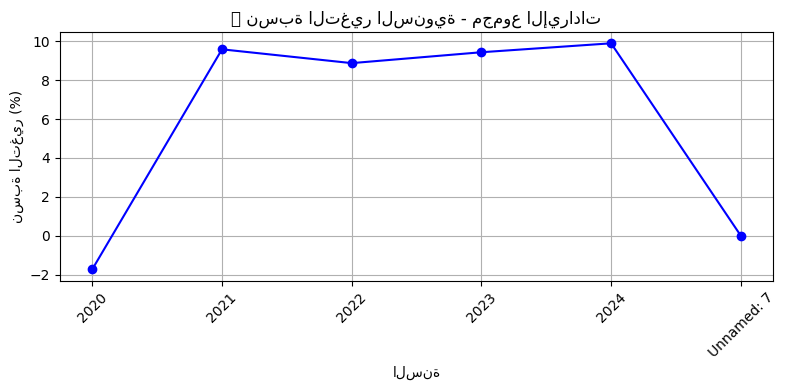

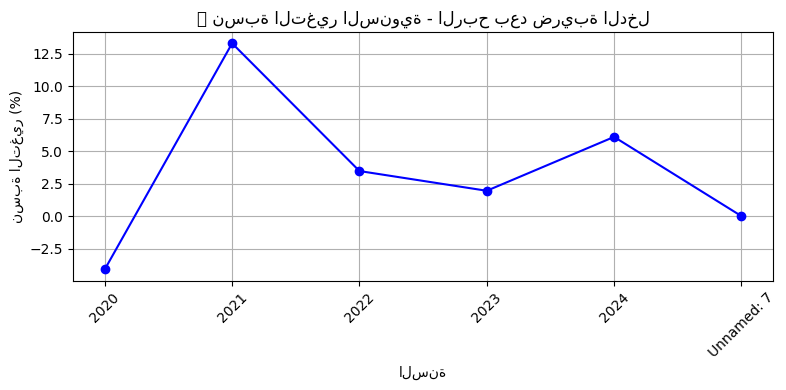

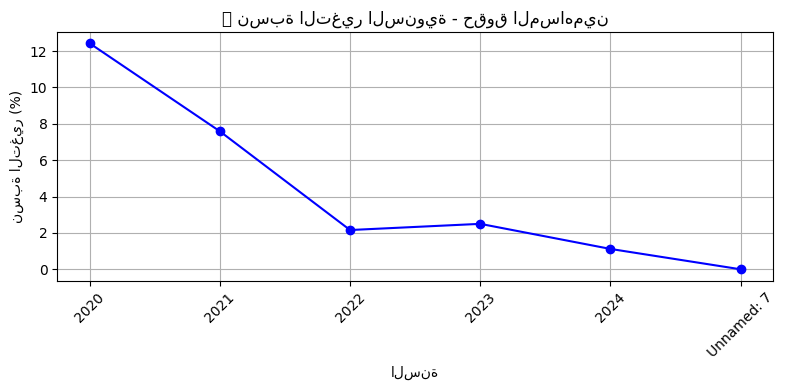

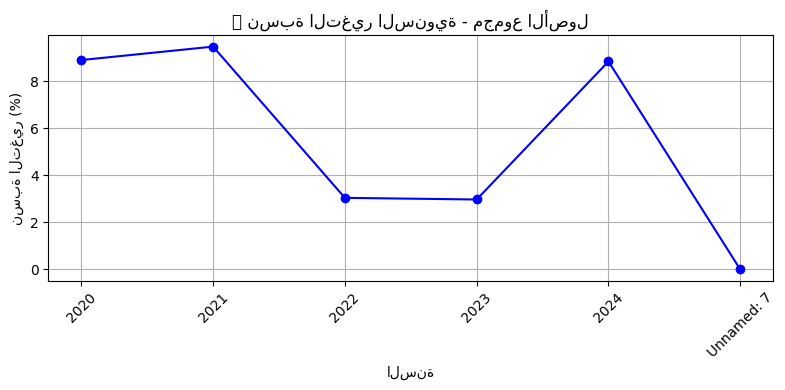

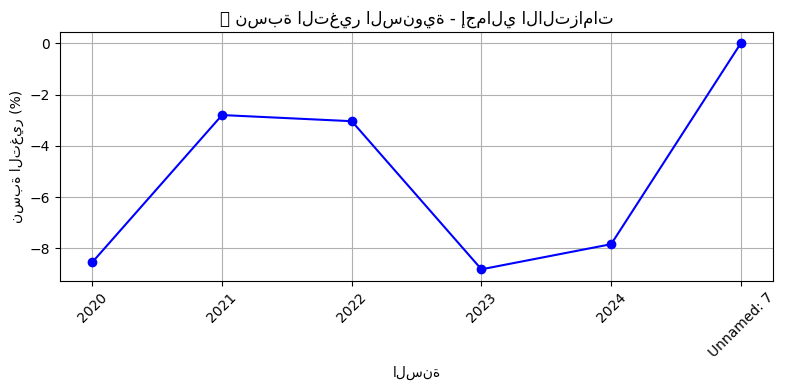

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import files

# 1. رفع ملف الإكسل
uploaded = files.upload()

# 2. قراءة الملف
for filename in uploaded.keys():
    file_path = filename
    break

df = pd.read_excel(file_path)

# 3. تحديد عمود البنود (البيان أو الاسم)
item_col = None
for col in df.columns:
    if 'بيان' in str(col) or 'الاسم' in str(col):
        item_col = col
        break

if item_col is None:
    raise ValueError("❌ لم يتم العثور على عمود يحتوي على 'بيان' أو 'الاسم'.")

# 4. تحديد أعمدة السنوات تلقائيًا (كل الأعمدة الرقمية باستثناء عمود البيان)
year_columns = [col for col in df.columns if col != item_col]

# 5. تنظيف القيم المالية من الفواصل
def clean_financial_values(val):
    try:
        if isinstance(val, str):
            return float(val.replace(',', '').replace('٫', '').strip())
        return float(val)
    except:
        return np.nan

for col in year_columns:
    df[col] = df[col].apply(clean_financial_values)

# 6. البنود المطلوبة لحساب نسبة التغير
items_to_analyze = {
    'مجموع الإيرادات': 'مجموع الإيرادات',
    'الربح بعد ضريبة الدخل': 'الربح بعد ضريبة الدخل',
    'حقوق المساهمين': 'حقوق المساهمين',
    'مجموع الأصول': 'مجموع الأصول',
    'إجمالي الالتزامات': 'إجمالي الالتزامات'
}

# 7. دالة لحساب نسبة التغير
def calculate_change_rate(series):
    return series.pct_change() * 100

# 8. استخراج القيم وحساب التغير
change_results = {}
for label, item_name in items_to_analyze.items():
    try:
        item_series = df[df[item_col] == item_name].iloc[0][year_columns]
        change_rate = calculate_change_rate(item_series)
        change_results[label] = change_rate.round(2)
    except IndexError:
        print(f"❌ لم يتم العثور على البند: {item_name}")
        change_results[label] = pd.Series([np.nan] * len(year_columns), index=year_columns)

# 9. إنشاء جدول النتائج
change_df = pd.DataFrame(change_results).T
change_df.columns = year_columns
change_df.index.name = "البند"

# 10. عرض الجدول
print("📊 نسب التغير السنوية لكل بند:")
display(change_df)

# 11. رسم المخططات البيانية
for index, row in change_df.iterrows():
    plt.figure(figsize=(8, 4))
    plt.plot(year_columns, row, marker='o', linestyle='-', color='blue')
    plt.title(f"📈 نسبة التغير السنوية - {index}")
    plt.xlabel("السنة")
    plt.ylabel("نسبة التغير (%)")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


In [ ]:
# تحليل سنوي لنسب التغير وتوليد توصيات لكل سنة على حدة
def generate_detailed_insights(change_df):
    insights_per_year = {}

    for year in change_df.columns:
        insights = {}
        for item, change in change_df[year].items():
            if pd.isna(change):
                insights[item] = f"❓ لا توجد بيانات للسنة {year}."
                continue

            msg = f"{change:.2f}% - "
            if change > 10:
                msg += "⬆️ تحسن كبير."
            elif change < -10:
                msg += "⬇️ تراجع كبير."
            elif -5 <= change <= 5:
                msg += "🔄 استقرار نسبي."
            else:
                msg += "⚠️ تغير طفيف."

            # توصيات مخصصة
            if item == 'مجموع الإيرادات':
                msg += " تحقق من أداء المنتجات والأسواق."
            elif item == 'الربح بعد ضريبة الدخل':
                msg += " راقب الكفاءة التشغيلية."
            elif item == 'حقوق المساهمين':
                msg += " تحليل التغيرات في رأس المال أو الأرباح المحتجزة."
            elif item == 'مجموع الأصول':
                msg += " راقب سياسة الاستثمار أو التخلص من الأصول."
            elif item == 'إجمالي الالتزامات':
                msg += " راقب نمو الديون مقابل الإيرادات."

            insights[item] = msg
        insights_per_year[year] = insights

    return insights_per_year

# تنفيذ التحليل المفصل
yearly_insights = generate_detailed_insights(change_df)

# عرض النتائج لكل سنة على حدة
for year, items in yearly_insights.items():
    print(f"\n📆 التحليل والتوصيات لسنة {year}:\n" + "-"*40)
    for item, analysis in items.items():
        print(f"🔹 {item}:\n   {analysis}")



📆 التحليل والتوصيات لسنة 2019:
----------------------------------------
🔹 مجموع الإيرادات:
   ❓ لا توجد بيانات للسنة 2019.
🔹 الربح بعد ضريبة الدخل:
   ❓ لا توجد بيانات للسنة 2019.
🔹 حقوق المساهمين:
   ❓ لا توجد بيانات للسنة 2019.
🔹 مجموع الأصول:
   ❓ لا توجد بيانات للسنة 2019.
🔹 إجمالي الالتزامات:
   ❓ لا توجد بيانات للسنة 2019.

📆 التحليل والتوصيات لسنة 2020:
----------------------------------------
🔹 مجموع الإيرادات:
   -1.73% - 🔄 استقرار نسبي. تحقق من أداء المنتجات والأسواق.
🔹 الربح بعد ضريبة الدخل:
   -4.10% - 🔄 استقرار نسبي. راقب الكفاءة التشغيلية.
🔹 حقوق المساهمين:
   12.43% - ⬆️ تحسن كبير. تحليل التغيرات في رأس المال أو الأرباح المحتجزة.
🔹 مجموع الأصول:
   8.89% - ⚠️ تغير طفيف. راقب سياسة الاستثمار أو التخلص من الأصول.
🔹 إجمالي الالتزامات:
   -8.54% - ⚠️ تغير طفيف. راقب نمو الديون مقابل الإيرادات.

📆 التحليل والتوصيات لسنة 2021:
----------------------------------------
🔹 مجموع الإيرادات:
   9.59% - ⚠️ تغير طفيف. تحقق من أداء المنتجات والأسواق.
🔹 الربح بعد ضريبة الدخل:
   13.31%